Goal: To classify reviews from yelp(review forum) into good or bad (i.e to predict if the customer is happy or not).

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
dataset = pd.read_csv("yelp.csv")

In [3]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
dataset.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [68]:
dataset["text"][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

NUMBER OF CHARACTERS IN A REVIEW

In [7]:
dataset["length"]= dataset["text"].apply(len)

In [8]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


COUNT OF NUMBER OF CHARACTERS

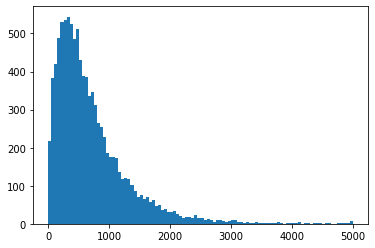

In [9]:
plt.hist(dataset.length, bins=100)
plt.show()

Most of the reviews have number of characters less than 1000 

In [10]:
dataset.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [11]:
dataset.stars.value_counts(normalize=True)

4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: stars, dtype: float64

VALUE COUNT OF RATINGS(STARS)

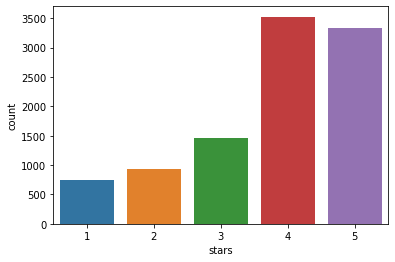

In [12]:
sns.countplot(dataset.stars)
plt.show()

Most of the reviews(arond 70%) are happy.

COMPARING REVIEWS' LENGTHS OF ALL STARS

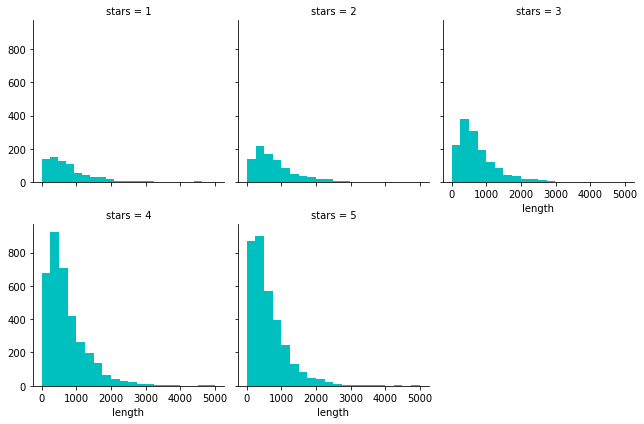

In [13]:
g= sns.FacetGrid(data= dataset, col='stars', col_wrap=3)
g.map(plt.hist, "length", bins=20, color='c')
plt.show()

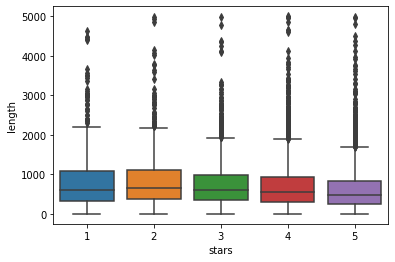

In [14]:
sns.boxplot(dataset.stars, dataset.length, data=dataset)
plt.show()

Average length of charecters for the stars is slightly decreasing. 

CATEGORIZING REVIEWS WITH STARS 1-3 AS BAD AND 4-5 AS GOOD

In [102]:
dataset_bad = pd.concat([dataset[dataset["stars"]==1], dataset[dataset["stars"]==2], dataset[dataset["stars"]==3]])
dataset_bad["stars"]=1
dataset_good = pd.concat([dataset[dataset["stars"]==4], dataset[dataset["stars"]==5]])
dataset_good["stars"]=5

FINAL DATASET CONSISITNG OF RATINGS CLASSIFIED INTO BAD(1) AND GOOD(5)

In [103]:
dataset_final = pd.concat([dataset_bad,dataset_good])

CREATING A FUNCTION TO PERFORM OPERATIONS ON REVIEWS:

1) REMOVING PUNCTUATION

2) REDUCING THE WORD TO ITS WORD STEM

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    ps = PorterStemmer()
    test_punc_removed_join_clean = [ps.stem(word) for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

CONVERTING THE UNIQUE WORDS INTO COLUMNS

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= message_cleaning)
dataset_cv = vectorizer.fit_transform(dataset_final["text"])

In [105]:
print(vectorizer.get_feature_names())

['0', '00', '007', '01', '01042012', '010712', '02', '020', '022010', '03342', '039', '039oz', '04052012', '05', '050', '06', '07', '07092008', '072511', '075', '08', '09', '090', '095', '099', '1', '10', '100', '1000', '10000', '100000', '1000am', '1000pm', '1000x', '1001', '100150', '1002', '1007', '100am', '100night', '100pm', '100th', '100yearold', '101', '1010', '10102010great', '1011', '101112', '1012', '1012glass', '1012pm', '101412', '1015', '1015ft', '101if', '102', '1024', '1025', '102729', '1030', '103011', '1030330', '1030am', '1030pm', '10312012', '1033', '104', '105', '1050', '1058', '1059', '105°', '1070', '1075', '107f', '108', '109', '1095', '1097', '1099', '10am', '10am4pm', '10bowl', '10close', '10cocktail', '10each', '10for', '10gallon', '10ish', '10k', '10mile', '10min', '10minut', '10month', '10night', '10oz', '10p', '10person', '10pm', '10pm12am', '10pm2am', '10pp', '10shrimp', '10th', '10thand', '10top', '10x', '10yard', '10yo', '11', '110', '1100', '1100am', '1

In [106]:
print(dataset_cv.shape)

(10000, 27227)


In [107]:
labels=dataset_final["stars"].values

In [108]:
X= dataset_cv
y= labels

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [110]:
X_train.shape

(8000, 27227)

In [111]:
X_test.shape

(2000, 27227)

FITTING NAIVE BAYES MODEL

In [112]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

EVALUATING MODEL ON TEST DATA

In [113]:
y_pred = classifier.predict(X_test)

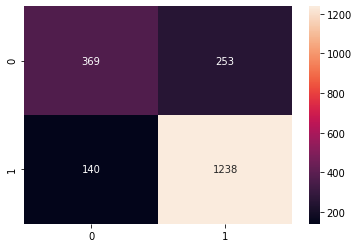

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_pred), fmt="g", annot=True)
plt.show()

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.59      0.65       622
           5       0.83      0.90      0.86      1378

    accuracy                           0.80      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.80      0.80      0.80      2000



EVALUATING MODEL ON COMPLETE DATA

In [116]:
y_pred_data = classifier.predict(X)

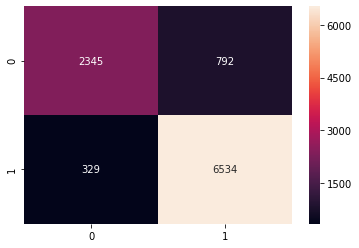

In [117]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y,y_pred_data), fmt="g", annot=True)
plt.show()

In [118]:
print(classification_report(y,y_pred_data))

              precision    recall  f1-score   support

           1       0.88      0.75      0.81      3137
           5       0.89      0.95      0.92      6863

    accuracy                           0.89     10000
   macro avg       0.88      0.85      0.86     10000
weighted avg       0.89      0.89      0.89     10000



Conclusion: Using NLP we could classify reviews into happy and unhappy with a weighted_avg f1-score of 80%.